In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import theano.tensor as T
import theano
from itertools import izip
import random
from random import shuffle


## 讀取 Miku

In [2]:
img_count = 0
def showimg(img):
    muki_pr = np.zeros((500,500,3))
    l =img.tolist()
    count = 0
    for x in range(500):
        for y in range(500):
            if l[count][0] >= .5:
                muki_pr[y][x] = 1
            else:
                muki_pr[y][x] = 0
                
            count += 1
    plt.imshow(muki_pr)
def saveimg(fname,img):
    muki_pr = np.zeros((500,500,3))
    l =img.tolist()
    count = 0
    for x in range(500):
        for y in range(500):
            if l[count][0] >= .5:
                muki_pr[y][x] = 1
            else:
                muki_pr[y][x] = 0
                
            count += 1
    plt.imsave(fname,muki_pr)

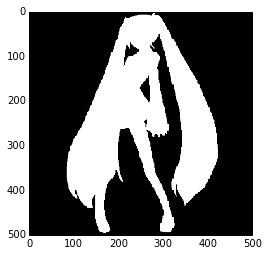

In [3]:
def read_muki():
    img_data = np.random.randn(250000,2)
    xy_data = []
    import random

    f = open('./muki.txt','rb')
    count = 0
    for line in f:
        y,x,c = line.split()
        xy_data.append([float(x),float(y)])
        
        x = (float(x) )*100. + 250
        y = (float(y) )*100. + 250
        c = float(c)
        
        if c >= 1:
            img_data[count] = (1,0)
        else:
            img_data[count] = (0,1)
            
            

#         img_data[count] = c
        
        count = count + 1
    return np.matrix(xy_data),img_data

xy_data,img_data = read_muki()    
showimg(img_data)


In [4]:
print xy_data[:10]
print img_data[:10]

[[-2.5  -2.5 ]
 [-2.49 -2.5 ]
 [-2.48 -2.5 ]
 [-2.47 -2.5 ]
 [-2.46 -2.5 ]
 [-2.45 -2.5 ]
 [-2.44 -2.5 ]
 [-2.43 -2.5 ]
 [-2.42 -2.5 ]
 [-2.41 -2.5 ]]
[[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]


## Muki NN
<img width=500px src='./muki_nn.png' />

In [5]:
from keras.models import Sequential

model = Sequential()

Using Theano backend.


In [6]:
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model.add(Dense(output_dim=128, input_dim=2))
model.add(Activation("relu"))
model.add(Dense(output_dim=128, input_dim=128))
model.add(Activation("relu"))
model.add(Dense(output_dim=8, input_dim=128))
model.add(Activation("relu"))
model.add(Dense(output_dim=2, input_dim=8))
model.add(Activation("softplus"))
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.05, momentum=0.9, nesterov=True), metrics=['accuracy'])


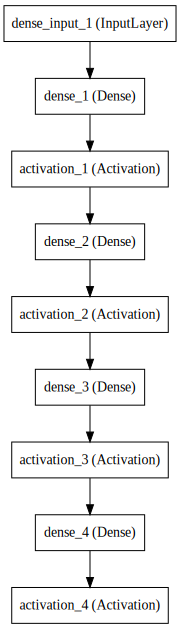

In [7]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [8]:
for ii in range(101,300):
    model.fit(xy_data, img_data, nb_epoch=5, batch_size=500)
    result = model.predict(xy_data)
    saveimg('./imgs/muki_relu_'+ str(ii) +'.png', result)

Epoch 1/5
250000/250000 [==============================] - 5s - loss: 0.1174 - acc: 0.8475     
Epoch 2/5
250000/250000 [==============================] - 5s - loss: 0.0680 - acc: 0.9188     
Epoch 3/5
250000/250000 [==============================] - 5s - loss: 0.0492 - acc: 0.9432     
Epoch 4/5
250000/250000 [==============================] - 5s - loss: 0.0406 - acc: 0.9552     
Epoch 5/5
250000/250000 [==============================] - 5s - loss: 0.0348 - acc: 0.9620     
Epoch 1/5
250000/250000 [==============================] - 5s - loss: 0.0308 - acc: 0.9665     
Epoch 2/5
250000/250000 [==============================] - 5s - loss: 0.0286 - acc: 0.9676     
Epoch 3/5
250000/250000 [==============================] - 1s - loss: 0.0260 - acc: 0.9705     
Epoch 4/5
250000/250000 [==============================] - 1s - loss: 0.0243 - acc: 0.9712     
Epoch 5/5
250000/250000 [==============================] - 1s - loss: 0.0225 - acc: 0.9729     
Epoch 1/5
250000/250000 [===============

KeyboardInterrupt: 

In [ ]:
result = model.predict(xy_data)
showimg(result)

## 結論:
* data 作 random suffule 的效果奇差，原因可以解釋為其實圖片的資料上下位置有相關系，如果 random 打散再作 mini batch ,反而喪失掉上下 pixle 之間相關的資料
* 在 hidden layer 設 128 個 neuron解釋力較強，至於原因需要再探咎
* 128 nerou <img width=100px src='./imgs/1_128_1/muki_810.png'>
* <a href='./imgs/output_2_128_1.mp4'>Training 過程</a>
* 256 nerou <img width=100px src='./imgs/2_256_1/muki_740.png/'>
* <a href='./imgs/output_2_256_1.mp4'>Training 過程</a>

